<a href="https://colab.research.google.com/github/elisabethelen/-/blob/main/Klasifikasi_Daun_12Kelas_Final_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌿 Klasifikasi Daun Lokal 12 Kelas
Menggunakan CNN, MobileNetV2, dan ResNet50 + Evaluasi & Penyimpanan Otomatis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!ls '/content/drive/MyDrive'

 1000288452-removebg.png
 17443580268553621563450361229879.jpg
 1746778423025276336827452020397.jpg
'202255202026_Elisabeth Serlina Elensia Bupu-1742919657407.pdf'
 202255202026_Elisabeth_Serlina_Elensia_Bupu-1742921237736.pdf
'202255202026_Elisabeth Serlina Elensia Bupu (1).pdf'
'202255202026_Elisabeth Serlina Elensia Bupu (2).pdf'
'202255202026_Elisabeth Serlina Elensia Bupu (3).pdf'
'202255202026_Elisabeth Serlina Elensia Bupu (4).pdf'
 202255202026_ElisabethSerlinaElensiaBupu_ImplementasiAlgoritmaVigenereCipherMenggunakanBahasaPemrogramanPythonUntukEnkripsiPesan.pdf
'202255202026_Elisabeth Serlina Elensia Bupu.pdf'
 202255202026-Tugas1.pdf
 202255202026_tugas3-1.pdf
 202255202026_tugas4
 202255202026-Tugas5.pdf
 7e93e40c-7675-4add-becf-76bdbe7c7dc0.jpg
'BASIS DATA II - 4B'
 Classroom
'Colab Notebooks'
 confusion_matrix.png
 dataset
 dataset1
'DatasetFloraGroup '
 DatasetFloraSplit
 datasetpiring
 deep_sort
 desktop-wallpaper-infinite-hearts-aesthetic-brown-poster-by-klaksy-┃-limite

In [13]:
dataset_path = '/content/drive/MyDrive/DatasetFloraSplit'

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2, ResNet50
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import cv2

## 📂 Load Dataset

In [18]:
# 1. Path ke dataset (ubah sesuai lokasi dataset di Google Drive kamu)
dataset_path = '/content/drive/MyDrive/DatasetFloraSplit'

# 1. Path ke dataset (ubah sesuai lokasi dataset di Google Drive kamu)
dataset_path = '/content/drive/MyDrive/DatasetFloraSplit'

# 2. Ukuran gambar & batch size
img_size = (224, 224)
batch_size = 32

# 3. ImageDataGenerator dengan split 50% untuk validasi
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.5
)

# 4. Generator untuk training (50%)
train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# 5. Generator untuk validasi (50%)
val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# 6. Ambil jumlah kelas dari generator
num_classes = train_gen.num_classes

Found 1575 images belonging to 2 classes.
Found 1573 images belonging to 2 classes.


## 🧠 ResNet50 + Saving Otomatis

In [19]:
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
resnet_base.trainable = False

resnet_model = Sequential([
    resnet_base,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')])

resnet_model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

resnet_path = '/content/drive/MyDrive/models/resnet50_daun_12kelas.h5'
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
checkpoint = ModelCheckpoint(resnet_path, monitor='val_loss', save_best_only=True, verbose=1)

resnet_history = resnet_model.fit(train_gen, validation_data=val_gen, epochs=50, callbacks=[early_stop, checkpoint])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.4672 - loss: 0.9558 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_loss improved from inf to 0.68502, saving model to /content/drive/MyDrive/models/resnet50_daun_12kelas.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 1546s 31s/step - accuracy: 0.4676 - loss: 0.9546 - val_accuracy: 0.5677 - val_loss: 0.6850
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.4849 - loss: 0.8772
Epoch 2: val_loss improved from 0.68502 to 0.68396, saving model to /content/drive/MyDrive/models/resnet50_daun_12kelas.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 922s 18s/step - accuracy: 0.4850 - loss: 0.8770 - val_accuracy: 0.5709 - val_loss: 0.6840
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.5173 - loss: 0.8116
Epoch 3: val_loss improved from 0.68396 to 0.68372, saving model to /content/drive/MyDrive/models/resnet50_daun_12kelas.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 878s 18s/step - accuracy: 0.5172 - loss: 0.8116 - val_accuracy: 0.5709 - val_loss: 0.6837
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.5022 - loss: 0.8017
Epoch 4: val_loss improved from 0.68372 to 0.68347, saving model to /content/drive/MyDrive/models/resnet50_daun_12kelas.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 997s 19s/step - accuracy: 0.5024 - loss: 0.8017 - val_accuracy: 0.5715 - val_loss: 0.6835
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.5327 - loss: 0.7734
Epoch 5: val_loss improved from 0.68347 to 0.68346, saving model to /content/drive/MyDrive/models/resnet50_daun_12kelas.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 914s 18s/step - accuracy: 0.5326 - loss: 0.7734 - val_accuracy: 0.5715 - val_loss: 0.6835
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.5103 - loss: 0.7602
Epoch 6: val_loss improved from 0.68346 to 0.68312, saving model to /content/drive/MyDrive/models/resnet50_daun_12kelas.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 933s 18s/step - accuracy: 0.5105 - loss: 0.7601 - val_accuracy: 0.5722 - val_loss: 0.6831
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.4929 - loss: 0.7666
Epoch 7: val_loss did not improve from 0.68312
50/50 ━━━━━━━━━━━━━━━━━━━━ 949s 19s/step - accuracy: 0.4931 - loss: 0.7665 - val_accuracy: 0.5722 - val_loss: 0.6841
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.5268 - loss: 0.7625
Epoch 8: val_loss did not improve from 0.68312
50/50 ━━━━━━━━━━━━━━━━━━━━ 983s 19s/step - accuracy: 0.5267 - loss: 0.7623 - val_accuracy: 0.5722 - val_loss: 0.6835
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.4877 - loss: 0.7491
Epoch 9: val_loss did not improve from 0.68312
50/50 ━━━━━━━━━━━━━━━━━━━━ 890s 18s/step - accuracy: 0.4881 - loss: 0.7490 - val_accuracy: 0.5722 - val_loss: 0.6835
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.5399 - loss: 0.7201
Epoch 10: val_loss improved from 0.68312 to 0.68288, savin

50/50 ━━━━━━━━━━━━━━━━━━━━ 890s 18s/step - accuracy: 0.5397 - loss: 0.7203 - val_accuracy: 0.5722 - val_loss: 0.6829
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.5142 - loss: 0.7332
Epoch 11: val_loss did not improve from 0.68288
50/50 ━━━━━━━━━━━━━━━━━━━━ 983s 19s/step - accuracy: 0.5146 - loss: 0.7329 - val_accuracy: 0.5722 - val_loss: 0.6830
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.5380 - loss: 0.7160
Epoch 12: val_loss improved from 0.68288 to 0.68283, saving model to /content/drive/MyDrive/models/resnet50_daun_12kelas.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 936s 19s/step - accuracy: 0.5378 - loss: 0.7160 - val_accuracy: 0.5722 - val_loss: 0.6828
Epoch 13/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.5220 - loss: 0.7252
Epoch 13: val_loss did not improve from 0.68283
50/50 ━━━━━━━━━━━━━━━━━━━━ 936s 18s/step - accuracy: 0.5225 - loss: 0.7250 - val_accuracy: 0.5722 - val_loss: 0.6829
Epoch 14/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.5318 - loss: 0.7026
Epoch 14: val_loss did not improve from 0.68283
50/50 ━━━━━━━━━━━━━━━━━━━━ 947s 19s/step - accuracy: 0.5314 - loss: 0.7028 - val_accuracy: 0.5722 - val_loss: 0.6833
Epoch 15/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.5017 - loss: 0.7240
Epoch 15: val_loss did not improve from 0.68283
50/50 ━━━━━━━━━━━━━━━━━━━━ 880s 18s/step - accuracy: 0.5020 - loss: 0.7238 - val_accuracy: 0.5722 - val_loss: 0.6830
Epoch 16/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.5414 - loss: 0.7081
Epoch 16: val_loss did not improve from 0.68283
50/5

**Penjelasan**

Model berhenti otomatis di epoch 17 karena tidak ada peningkatan lagi sejak epoch 12, dan hasil terbaik ada di epoch 12, jadi model dikembalikan ke kondisi terbaik itu


## 🧠 Evaluasi Model ResNet50


Validation Loss : 0.6828
Validation Accuracy : 0.5722
Classification Report:
              precision    recall  f1-score   support

       train       0.57      1.00      0.73       900
         val       0.00      0.00      0.00       673

    accuracy                           0.57      1573
   macro avg       0.29      0.50      0.36      1573
weighted avg       0.33      0.57      0.42      1573



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


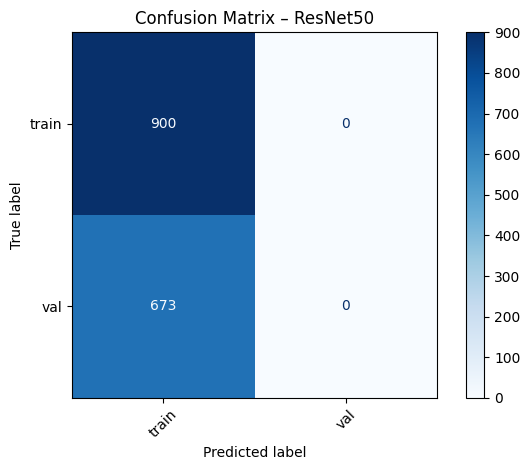

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pickle

# 1️⃣ Load model terbaik dari file .h5
resnet_path = '/content/drive/MyDrive/models/resnet50_daun_12kelas.h5'
best_model = tf.keras.models.load_model(resnet_path)

# 2️⃣ Evaluasi langsung di validation/test set
loss, acc = best_model.evaluate(val_gen, verbose=0)
print(f"Validation Loss : {loss:.4f}")
print(f"Validation Accuracy : {acc:.4f}")

# 3️⃣ Prediksi label
y_true = val_gen.classes
y_pred_probs = best_model.predict(val_gen, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)

# 4️⃣ Classification Report
class_names = list(val_gen.class_indices.keys())
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# 5️⃣ Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45, cmap='Blues')
plt.title("Confusion Matrix – ResNet50")
plt.tight_layout()
plt.show()